In [234]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
# import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.metrics import classification_report,recall_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from numpy import where
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier




In [75]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-初步数据处理.csv"


In [91]:
df = pd.read_csv(fpath)
to_remove = pd.DataFrame()

# 遍历每个类别
for category in [0,1,2,3]:
    # 获取类别为 category 的数据行
    category_rows = df[df['anxiety'] == category]
    
    # 获取 category 类别下的30%的数据行
    num_rows = int(0.3 * len(category_rows))
    rows_to_move = category_rows.sample(n=num_rows, random_state=42)
    
    # 将 rows_to_move 添加到 to_remove 中
    to_remove = pd.concat([to_remove, rows_to_move])
    
    # 从原始数据中删除 rows_to_move
    df = df.drop(rows_to_move.index)
    
# 将 to_remove 存储到文件中
df.to_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/焦虑类别70.csv', index=False)
to_remove.to_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/焦虑类别30.csv', index=False)

原始数据集类别分布： Counter({4.0: 6569, 3.0: 325, 2.0: 82, 1.0: 75})
Accuracy: 67.06
              precision    recall  f1-score   support

         1.0       0.02      0.24      0.04        17
         2.0       0.02      0.29      0.04        28
         3.0       0.13      0.24      0.17       103
         4.0       0.98      0.70      0.82      1968

    accuracy                           0.67      2116
   macro avg       0.29      0.37      0.27      2116
weighted avg       0.92      0.67      0.77      2116



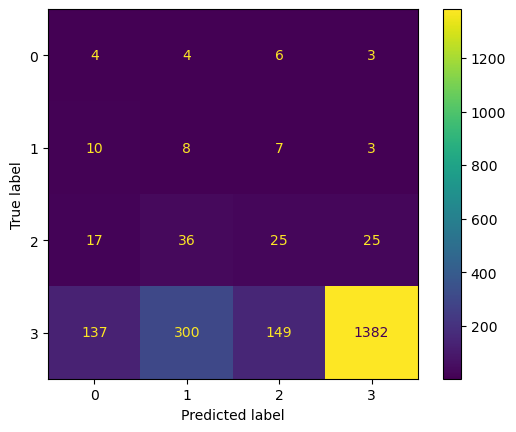

Recall:  0.6706049149338374
ROC AUC:  0.6168823212061764
F1:  0.7696333471959016
Random Forest选择的重要特征: ['STPQawt2' 'STPQawt1' 'OSI5' 'STPQlt13' 'WORKTIME1' 'WORKTIME4' 'STPQai3'
 'STPQai4' 'LSS2' 'OSI13' 'PBSMHS19' 'OSI16' 'STPQoc25' 'WFCS6' 'STPQil2'
 'PANAS1' 'STPQpost2' 'STPQoc24' 'LSS4' 'WFCS4' 'STPQawt3' 'WFCS7'
 'STPQpost1' 'exeminp' 'OSI7' 'WFCS3' 'OSI14' 'STPQpe1' 'OSI11' 'WFCS5']


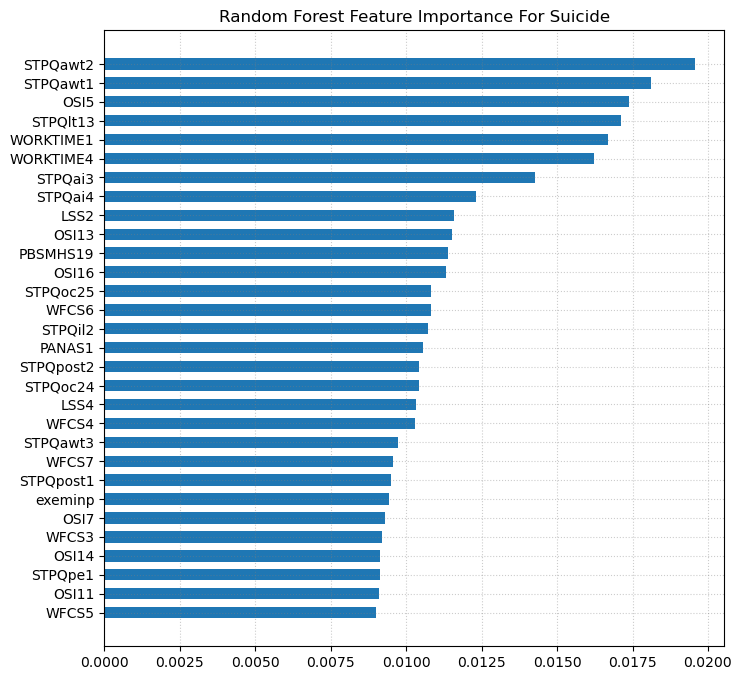

In [243]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-初步数据处理.csv"
from imblearn.ensemble import RUSBoostClassifier,BalancedRandomForestClassifier #63 84
from imblearn.ensemble import BalancedBaggingClassifier #69 74
from sklearn.metrics import make_scorer, f1_score
import warnings
warnings.filterwarnings('ignore')

Dataset = pd.read_csv(fpath)
number = 30
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('anxiety', axis=1)
# Dataset = Dataset.drop('suicide', axis=1)

y = Dataset['suicide']
x = Dataset.drop('suicide', axis=1)

# y = Dataset['anxiety']
# x = Dataset.drop('anxiety', axis=1)

# y = Dataset['depression']
# x = Dataset.drop('depression', axis=1)
print('原始数据集类别分布：', Counter(y))
random_state = 20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

# # # create the classifier
# clf = BalancedRandomForestClassifier()

# # create the scorer
# scorer = make_scorer(f1_score, average='weighted')

# # create the grid search object
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=scorer)

# # fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # print the best parameters and score
# print("Best parameters: {}".format(grid_search.best_params_))
# print("Best f1 score: {:.2f}".format(grid_search.best_score_))
# smote = SMOTE( random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train,y_train)
# print(Counter(y_resampled))


brfc = BalancedRandomForestClassifier(class_weight = 'balanced',random_state=20,max_depth= 15, min_samples_split = 2, n_estimators=200)
#suicide
# brfc = BalancedRandomForestClassifier(class_weight = 'balanced_subsample',random_state=42,max_depth= 5, min_samples_split = 2, n_estimators=200)

brfc.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = brfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
report = classification_report(y_test, y_pred)
print(report)
# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b, multi_class='ovr')

# roc_auc = roc_auc_score(y_test, pred_prob, multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)
print('F1: ', f1)

names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])

rf_feature_important = brfc.feature_importances_
rf_x_score = np.sort(rf_feature_important)[::-1]
rf_rank_idx  = np.argsort(rf_feature_important)[::-1]
rf_selected_rank_idx = rf_rank_idx[:number]
rf_selected_rank_names = names_dicts.loc[:, rf_selected_rank_idx]
rf_label = rf_selected_rank_names.values[0, :]

# label = rf_selected_rank_names.values[0, :]
# Datasetnew = Dataset[label]
# # Datasetnew['depression'] = Dataset['depression']
# # Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员抑郁量表-重要特征数据.csv",sep=',',index=False)

# # Datasetnew['anxiety'] = Dataset['anxiety']
# # Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员焦虑表-重要特征数据.csv",sep=',',index=False)

# Datasetnew['suicide'] = Dataset['suicide']
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员自杀倾向-重要特征数据.csv",sep=',',index=False)

print("Random Forest选择的重要特征:",rf_label)

# 随机森林可视化
plt.figure(figsize=(8, 8))
plt.barh(rf_label[::-1], rf_x_score[:number][::-1], 0.6, align='center')
plt.grid(ls=':', color='gray', alpha=0.4)
plt.title("Random Forest Feature Importance For Suicide")
plt.savefig("前"+str(number)+"名特征")
plt.show()



In [231]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE,KMeansSMOTE
from imblearn.over_sampling import ADASYN,SMOTENC,SMOTEN
from sklearn.metrics import recall_score, roc_auc_score, f1_score
fpath="/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/自杀倾向类别70.csv"
fpath2="/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/自杀倾向类别30.csv"

# fpath="/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/抑郁类别70.csv"
# fpath2="/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/抑郁类别30.csv"

# fpath="/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/焦虑类别70.csv"
# fpath2="/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/焦虑类别30.csv"

Dataset = pd.read_csv(fpath)
testData = pd.read_csv(fpath2)
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

number = 30
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('anxiety', axis=1)
# Dataset = Dataset.drop('suicide', axis=1)

y = Dataset['suicide']
x = Dataset.drop('suicide', axis=1)

# y = Dataset['depression']
# x = Dataset.drop('depression', axis=1)

# y = Dataset['anxiety']
# x = Dataset.drop('anxiety', axis=1)
print('原始数据集类别分布：', Counter(y))
#无效果
sampling_strategy = {4: 3000, 3: 2500, 2: 2900,1:3000}


# 定义欠采样和过采样器
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline = make_pipeline(
    under_sampler,
    over_sampler,
    rf
)# fit the pipeline on the training data
X_resampled, y_resampled = pipeline.fit_resample(x, y)
# smote = SMOTE( random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train,y_train)
print(Counter(y_resampled))

# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_resampled, y_resampled)

testData = testData.drop('depression', axis=1)
testData = testData.drop('anxiety', axis=1)
# testData = testData.drop('suicide', axis=1)

y_test = testData['suicide']
x_test = testData.drop('suicide', axis=1)

# y_test = testData['depression']
# x_test = testData.drop('depression', axis=1)

# y_test = testData['anxiety']
# x_test = testData.drop('anxiety', axis=1)

print(Counter(y_test))
y_pred = rf.predict(X_test)
print(Counter(y_pred))
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)
recall = recall_score(y_test, y_pred, average='weighted')
# pred_prob = rf.predict_proba(x_test)

# roc_auc = roc_auc_score(y_test, pred_prob, multi_class='ovo')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b, multi_class='ovr')

f1 = f1_score(y_test, y_pred, average='weighted')
# 输出评价指标
precision = precision_score(y_test, y_pred,average='weighted')
print("Precision: {:.2f}%".format(precision * 100))

print('Recall: ', recall)
print('ROC AUC: ', roc_auc)
print('F1: ', f1)
# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

原始数据集类别分布： Counter({4.0: 4599, 3.0: 228, 2.0: 58, 1.0: 53})


ValueError: The {0} target class is/are not present in the data.